# Hold_out Validation

In [0]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Importing the data

In [0]:
data = pd.read_csv('data_cleaned.csv')

In [3]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Image 1

## Splitting

### Saperating Dependent and Independent Variables

In [0]:
# For train set
data_x = data.drop(['Survived'], axis=1)
data_y = data['Survived']

#### Scaling the data

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_x = ss.fit_transform(data_x)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## IMAGE 1

### Creating Validation and test set

In [0]:
from sklearn.model_selection import train_test_split as tts
train1_x, test_x , train1_y, test_y = tts( data_x, data_y , test_size = 0.2 , random_state = 9, stratify = data_y)


In [19]:
train_x, val_x, train_y, val_y = tts(train1_x, train1_y, test_size = 0.2 , random_state = 9, stratify = train1_y)

print('training data    ',train_x.shape,train_y.shape)
print('validation data  ',val_x.shape,val_y.shape)
print('test data        ',test_x.shape,test_y.shape)

training data     (569, 24) (569,)
validation data   (143, 24) (143,)
test data         (179, 24) (179,)


### Checking Distribution of train test and validation set

In [20]:
train_y.value_counts()/len(train_y)

0    0.629174
1    0.370826
Name: Survived, dtype: float64

In [21]:

val_y.value_counts()/len(val_y)

0    0.629371
1    0.370629
Name: Survived, dtype: float64

In [22]:
test_y.value_counts()/len(test_y)

0    0.564246
1    0.435754
Name: Survived, dtype: float64

In [0]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [0]:
def F1score(K):
  '''
  Takes an input K consisting of a range of K values for KNN
  Input:
  K = list
  
  Returns: lists containing F1 corresponding to every value of K
  train_f1 = list of train f1 score corresponding K
  val_f1  = list of test f1 score corresponding to K
  '''
  # initiating empty list
  train_f1 = []
  val_f1 = []
  
  # training model for evey value of K
  for i in K:
     # Instance oh KNN
    clf  = KNN(n_neighbors = i)
    clf.fit(train_x, train_y)
    
    # Appending F1 scores to empty list claculated using the predictions
    tmp = clf.predict(train_x)
    tmp = f1_score(tmp,train_y)
    train_f1.append(tmp)
    
    tmp = clf.predict(val_x)
    tmp = f1_score(tmp,val_y)
    val_f1.append(tmp)
    
  return train_f1, val_f1

In [0]:
#Defining K range
k = range(1,50)

In [0]:
# calling above defined function
train, val = F1score(k)

In [27]:
score = pd.DataFrame({'train score': train, 'validation score': val}, index = k)
score

,train score,validation score
1,0.985782,0.673077
2,0.814607,0.658824
3,0.800959,0.714286
4,0.759358,0.717391
5,0.793187,0.699029
6,0.731183,0.711111
7,0.744898,0.723404
8,0.723861,0.704545
9,0.757033,0.729167
10,0.717391,0.629213


### Visualizing

(0.5, 1)

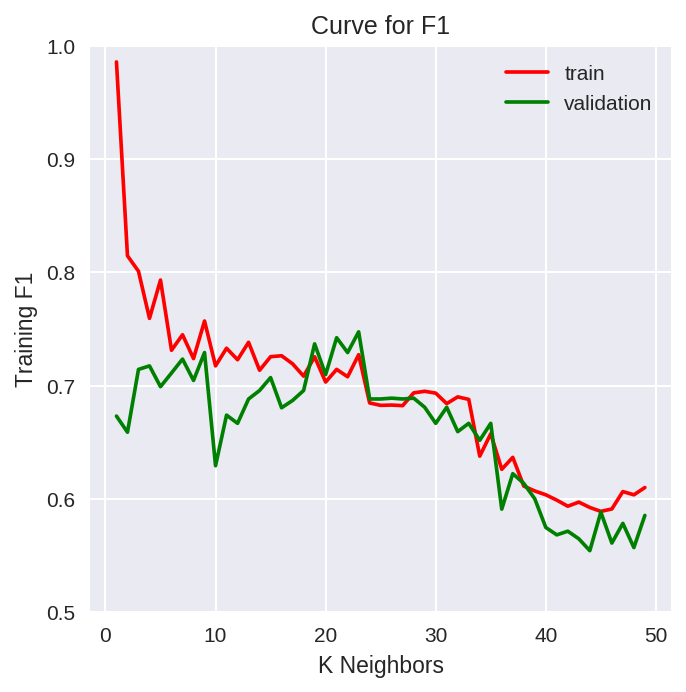

In [33]:
# plotting the Curves
plt.figure(figsize=(5,5), dpi=150, facecolor='w', edgecolor='k')
plt.plot(k, train, color = 'red', label = 'train')
plt.plot(k, val, color = 'green', label = 'validation')
plt.xlabel('K Neighbors')
plt.ylabel('Training F1')
plt.title('Curve for F1')
plt.legend()
plt.ylim(0.5,1)

### Using the optimal value of K to build the final model

In [18]:
# Optimal K from Graph
clf = KNN( n_neighbors = 6)
clf.fit(train_x,train_y)

# F1 on Training
tmp = clf.predict(train_x)
tmp = f1_score(tmp , train_y)

# F1 on Completely unseen Test data
tmp1 = clf.predict(test_x)
tmp1 = f1_score(tmp1 , test_y)

print('Train F1 :', tmp)
print('Test F1  :', tmp1)

Train F1 : 0.7282913165266106
Test F1  : 0.5669291338582678
